In [1]:
import pandas,numpy
from sklearn import model_selection,preprocessing
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [2]:
# load the dataset
data = open('/home/ankush/Github/Machine Learning/Text Classification/AnalyticsVidya/data/corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# create a dataframe using texts and lables
trainDF = pandas.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

In [3]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'],test_size=0.1)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [4]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('/home/ankush/Github/Machine Learning/Text Classification/AnalyticsVidya/data/wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras import regularizers

regularizers.l1_l2(l1=0.001, l2=0.001)
model = Sequential()
model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False,input_length=70))
#model.add(Dropout(0.5))
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 70, 300)           10041000  
_________________________________________________________________
flatten_1 (Flatten)          (None, 21000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                672032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 10,713,065
Trainable params: 672,065
Non-trainable params: 10,041,000
_________________________________________________________________


In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
               metrics=['acc'])
history = model.fit(train_seq_x, train_y,
                    epochs=10,
                    batch_size=256,
                    validation_data=(valid_seq_x, valid_y))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 3s 331us/step - loss: 0.6878 - acc: 0.6378 - val_loss: 0.6109 - val_acc: 0.7390
Epoch 2/10
9000/9000 [==============================] - 2s 253us/step - loss: 0.5609 - acc: 0.7602 - val_loss: 0.6386 - val_acc: 0.6870
Epoch 3/10
9000/9000 [==============================] - 2s 240us/step - loss: 0.5032 - acc: 0.8166 - val_loss: 0.6231 - val_acc: 0.6800
Epoch 4/10
9000/9000 [==============================] - 2s 224us/step - loss: 0.4679 - acc: 0.8364 - val_loss: 0.5594 - val_acc: 0.7810
Epoch 5/10
9000/9000 [==============================] - 2s 242us/step - loss: 0.4396 - acc: 0.8597 - val_loss: 0.6305 - val_acc: 0.7090
Epoch 6/10
9000/9000 [==============================] - 2s 241us/step - loss: 0.4172 - acc: 0.8761 - val_loss: 0.7672 - val_acc: 0.6290
Epoch 7/10
9000/9000 [==============================] - 2s 244us/step - loss: 0.4055 - acc: 0.8860 - val_loss: 0.5715 - val_acc: 0.7760


In [28]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, GlobalAveragePooling1D
from keras import layers

model = Sequential()
model.add(layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False,input_length=70))
model.add(layers.GlobalAveragePooling1D())
#model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 70, 300)           10041000  
_________________________________________________________________
global_average_pooling1d_3 ( (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                9030      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 10,140,361
Trainable params: 99,361
Non-trainable params: 10,041,000
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_seq_x, train_y,
                    epochs=10,
                    batch_size=32,
                    validation_data=(valid_seq_x, valid_y))

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 2s 277us/step - loss: 0.5546 - acc: 0.7327 - val_loss: 0.4472 - val_acc: 0.8000
Epoch 2/50
9000/9000 [==============================] - 2s 205us/step - loss: 0.4173 - acc: 0.8128 - val_loss: 0.4312 - val_acc: 0.7980
Epoch 3/50
9000/9000 [==============================] - 2s 208us/step - loss: 0.3989 - acc: 0.8213 - val_loss: 0.4372 - val_acc: 0.8150
Epoch 4/50
9000/9000 [==============================] - 2s 213us/step - loss: 0.3969 - acc: 0.8232 - val_loss: 0.4325 - val_acc: 0.7980
Epoch 5/50
9000/9000 [==============================] - 2s 216us/step - loss: 0.3900 - acc: 0.8242 - val_loss: 0.4224 - val_acc: 0.8200
Epoch 6/50
9000/9000 [==============================] - 2s 215us/step - loss: 0.3853 - acc: 0.8310 - val_loss: 0.4450 - val_acc: 0.8210
Epoch 7/50
9000/9000 [==============================] - 2s 217us/step - loss: 0.3831 - acc: 0.8348 - val_loss: 0.4118 - val_acc: 0.8240


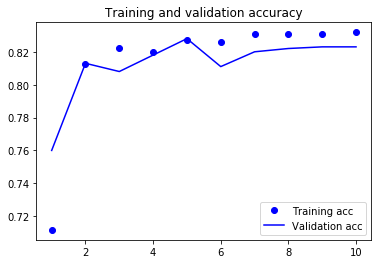

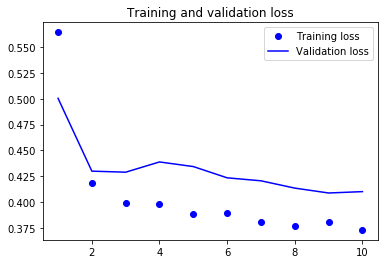

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, GlobalAveragePooling1D
from keras import layers
from keras import regularizers

regularizers.l1_l2(l1=0.001, l2=0.001)
model = Sequential()
model.add(layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False,input_length=70))
model.add(layers.GlobalAveragePooling1D())
#model.add(Flatten())
model.add(layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 70, 300)           10041000  
_________________________________________________________________
global_average_pooling1d_2 ( (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_7 (Dense)              (None, 30)                9030      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 10,140,361
Trainable params: 99,361
Non-trainable params: 10,041,000
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [27]:
history = model.fit(train_seq_x, train_y,
                    epochs=50,
                    batch_size=512,
                    validation_data=(valid_seq_x, valid_y))

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s 124us/step - loss: 0.4299 - acc: 0.8282 - val_loss: 0.4605 - val_acc: 0.8200
Epoch 2/50
9000/9000 [==============================] - 1s 85us/step - loss: 0.4189 - acc: 0.8363 - val_loss: 0.4568 - val_acc: 0.8170
Epoch 3/50
9000/9000 [==============================] - 1s 72us/step - loss: 0.4178 - acc: 0.8341 - val_loss: 0.4557 - val_acc: 0.8240
Epoch 4/50
9000/9000 [==============================] - 1s 69us/step - loss: 0.4164 - acc: 0.8359 - val_loss: 0.4547 - val_acc: 0.8220
Epoch 5/50
9000/9000 [==============================] - 1s 71us/step - loss: 0.4170 - acc: 0.8348 - val_loss: 0.4538 - val_acc: 0.8230
Epoch 6/50
9000/9000 [==============================] - 1s 70us/step - loss: 0.4173 - acc: 0.8338 - val_loss: 0.4562 - val_acc: 0.8120
Epoch 7/50
9000/9000 [==============================] - 1s 72us/step - loss: 0.4145 - acc: 0.8379 - val_loss: 0.4567 - val_acc: 0.8210
Epoch 

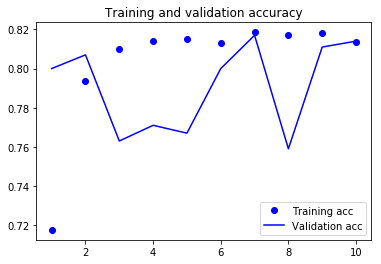

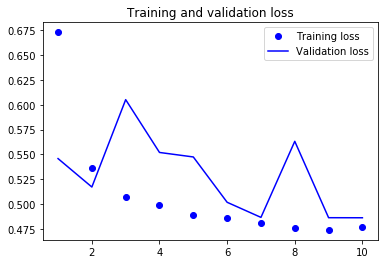

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [25]:
history = model.fit(train_seq_x, train_y,
                    epochs=20,
                    batch_size=32,
                    validation_data=(valid_seq_x, valid_y))

Train on 9000 samples, validate on 1000 samples
Epoch 1/20
9000/9000 [==============================] - 2s 248us/step - loss: 0.4830 - acc: 0.8109 - val_loss: 0.5330 - val_acc: 0.7860
Epoch 2/20
9000/9000 [==============================] - 3s 295us/step - loss: 0.4768 - acc: 0.8136 - val_loss: 0.5323 - val_acc: 0.7900
Epoch 3/20
9000/9000 [==============================] - 2s 234us/step - loss: 0.4715 - acc: 0.8149 - val_loss: 0.6213 - val_acc: 0.7460
Epoch 4/20
9000/9000 [==============================] - 3s 280us/step - loss: 0.4692 - acc: 0.8113 - val_loss: 0.4963 - val_acc: 0.7910
Epoch 5/20
9000/9000 [==============================] - 2s 248us/step - loss: 0.4679 - acc: 0.8090 - val_loss: 0.6434 - val_acc: 0.7070
Epoch 6/20
9000/9000 [==============================] - 2s 204us/step - loss: 0.4649 - acc: 0.8172 - val_loss: 0.5266 - val_acc: 0.7690
Epoch 7/20
9000/9000 [==============================] - 2s 230us/step - loss: 0.4614 - acc: 0.8118 - val_loss: 0.5401 - val_acc: 0.7820
